# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Для выполнения поставленной задачи выполним следующие шаги:
1. [Обзор данных](#step1)
2. [Предобработка данных](#step2)
3. [Изменение типов данных](#step3)
4. [Добавление основных технико - экономических показателей квартиры](#step4)
5. [Анализ характеристик квартир, цен и времени публикаций](#step5)
6. [Анализ факторов, влияющих на стоимость квартиры](#step6)
7. [Что такое центр города](#step7)
8. [Исследование квартир в центре](#step8)
9. [Общий вывод](#step9)

### Шаг 1. Обзор данных <a id='step1'></a>

Расмотрим предоставленные данные.

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
#чтение файла и сохранение в data
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') 
data.head() #вывод на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь посмотрим общую информацию о данных с помощью метода info().

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Рассмотрим подробно полученную из таблицы информацию. Всего в таблице 22 столбца различного формата. Из них:
* bool - 2 столбца
* float64 - 14 столбцов
* int64 - 3 столбца
* object - 3 столбца

Рассмотрим, какая информация содержится в каждом столбце датасета.
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Количество значений  в столбцах различается, что свидетельствует о пропусках данных. Но можно сказать, что мы имеем 23698 строк.

### Вывод

Всего в сете 23698 предложений о продаже квартиры. В каждой стороке содержится информация о технических характеристиках, расположении и цене квартир. Сразу видны проблемы с пропусками в данных.

### Шаг 2. Предобработка данных <a id='step2'></a>

Сумарное количество пропусков в данных.

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

У нас имеется 49 пропусков по столбцу с названием населённого пункта ('locality_name'). Так как это всего 0,2% от всех данных и точно их восставить не получится, то удалим строки с пропусками в этом столбце. Используем dropna.

In [4]:
data.dropna(subset = ['locality_name'], inplace = True) #удаление пустых строк
print('Пропусков после обработки:', data.locality_name.isna().sum())

Пропусков после обработки: 0


Имеется 9195 пропусков в столбце 'ceiling_height'. Эти данные скорее всего вносятся пользователем и объявление можно создать без этого параметра квартиры, поэтому многие его пропускают, так как это не самый критичный параметр. В данном случае это количественная переменная, поэтому можем заполнить пропуски одной из мер центральной тенденции (средним или медианой). 
Для этого посмотрим основные метрики для параметра высота потолка. Воспользуемся методом describe.

In [5]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видим, что есть выбросы в данных, так как минимальныя высота всего 1 метр, а максимальная 100  метров. При этом, среднее по высоте значение больше медианы, это значит что слишком высоких потолков больше, чем слишкомм низких.
<p> Для заполнения пропусков воспользуемся медианой, так как она не чувительна к выбросым.

In [6]:
data.ceiling_height = data.ceiling_height.fillna(data.ceiling_height.median()) #замена пропуков на медианe

In [7]:
#Проверим пропуски после обработки
print('Пропусков после обработки:', data.ceiling_height.isna().sum())

Пропусков после обработки: 0


Теперь займемся пропусками в этажах зданий. Данный параметр также вводится  вручную, поэтому продавцы могли его не заполнить. В зависимости от размера города высота типичной этажности зданий можем менять. Для заполнения пропусков воспользуемся медианами высот зданий в зависимости от локации.

In [8]:
grp = data.groupby(['locality_name']) #сгруппируем данные по населенному пункту
data['floors_total'] = grp.floors_total.apply(lambda x: x.fillna(x.median())) #заполение пропусков медианами групп
print('Пропусков после обработки:', data['floors_total'].isnull().sum())

Пропусков после обработки: 0


Пропуски по столбцу *is_apartment* обусловлены тем, что люди не отмечают вид недвижимости, если эта квартира. Заменим пропуски на значение False.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False) #замена пропусков на False
print('Пропусков после обработки:', data['is_apartment'].isnull().sum())

Пропусков после обработки: 0


Пропуски в количестве балконов (столбец *balcony*) скорее всего из за того, что в квартире нет балкона. Заменим пропуски на 0.

In [10]:
data['balcony'] = data['balcony'].fillna(0) #замена пропусков на 0
print('Пропусков после обработки:', data['balcony'].isnull().sum())

Пропусков после обработки: 0


Займемся жилой площадью и площадью кухонь в квартирах.
<p>Большинство квартир имеет стандартные планировки и жилая площадь зависит от количесва комнат. Заполним пропуски в столбце *living_area* медианой в зависимости от количества комнат.

In [11]:
grp = data.groupby(['rooms']) #сгруппируем данные по числу комнат
data['living_area'] = grp.living_area.apply(lambda x: x.fillna(x.median())) #заполение пропусков медианами групп
print('Пропусков после обработки:', data['living_area'].isnull().sum())

Пропусков после обработки: 0


С площадями кухонь поступим аналогичным способом.

In [12]:
data['kitchen_area'] = grp.kitchen_area.apply(lambda x: x.fillna(x.median())) #заполение пропусков медианами групп
print('Пропусков после обработки:', data['kitchen_area'].isnull().sum())

Пропусков после обработки: 197


/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [13]:
len(data.query('rooms == 0')) #количество квартир с 0 комнат

197

In [14]:
len(data.query('studio == True'))

149

Приведем все квартиры к виду, если нет комнат, то это студия.

In [15]:
data.loc[data['rooms'] == 0, 'studio'] = True
data.loc[data['studio'] == True, 'rooms'] = 0
print('Количество студий:', len(data.query('studio == True')))

Количество студий: 208


Квартиры студии не имеют кухни, поэтому пропуски заменим на 0.

In [16]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0 #замена на 0
print('Пропусков после обработки:', data['kitchen_area'].isnull().sum())

Пропусков после обработки: 0


Расстояние до ближайшего аэропорта количественная величина. Заполняется автоматически системой, но могут возникнуть сбои, поэтому у нас пропуски. 
<p> Средние расстояние от населенных пунктов до аэропота заполним медианами.

In [17]:
print('Пропусков да обработки:', data['airports_nearest'].isnull().sum())
grp = data.groupby(['locality_name']) #сгруппируем данные по городам
data['airports_nearest'] = grp.airports_nearest.apply(lambda x: x.fillna(x.median())) #заполение пропусков медианами групп
print('Пропусков после обработки:', data['airports_nearest'].isnull().sum())

Пропусков да обработки: 5534
Пропусков после обработки: 5386


Таким способом удалось заполнить небольшую часть пропусков. Близость к аэропорту является важным показателем только для большого города - Санкт-Петербурка. Поэтоиму разделим все населенные пункты на 2 группы:
* город
* область

Пропуски заполним медианами групп.

In [18]:
#функиця группировки
def local_group(row):
    if row == 'Санкт-Петербург':
        return 'город'
    return 'область'

data['local_group'] = data['locality_name'].apply(local_group) #добавление столбца с группами
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,local_group
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,город
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город


In [19]:
grp = data.groupby(['local_group']) #сгруппируем данные по региону
data['airports_nearest'] = grp.airports_nearest.apply(lambda x: x.fillna(x.median())) #заполение пропусков медианами групп
print('Пропусков после обработки:', data['airports_nearest'].isnull().sum())

Пропусков после обработки: 0


Расстояние до центра актуально только для Санкт-Петербурга. Проверим сколько пропусков мы имеем в этом городе.

In [20]:
data.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].isnull().sum()

61

Цены на квартиры одной площадь и на примерно одном растоянии от центра должны быть примерно одинаковыми. Заполним пропуски ближайшими соседними значениями. Для этого отсортируем сет по площади и расстоянию. 

In [21]:
#заменим пропуск на слудующее заполненное значение
data = data.sort_values(by = ['locality_name','total_area' ,'cityCenters_nearest'])
data.loc[:, 'cityCenters_nearest'] = data.loc[:, 'cityCenters_nearest'].fillna(method = 'bfill')#заменим пропуск на слудующее заполненное значение
data.loc[:, 'cityCenters_nearest'] = data.loc[:, 'cityCenters_nearest'].fillna(method = 'ffill')#заменим пропуск на предыдщение значение
print('Пропусков по Санкт - Петербургу:', data.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].isnull().sum())
print('Пропусков всего:', data['cityCenters_nearest'].isnull().sum())

Пропусков по Санкт - Петербургу: 0
Пропусков всего: 0


Расмотрим пропуски в столбцах *parks_around3000* (число парков в радиусе 3 км) и *parks_nearest* (расстояние до ближайшего парка (м)).
<p> Посмотрим какие вообще существуют значения. Посомтрим случай, когда парк на расстоянии 3 км есть, но ближайший парк не заполнен.

In [22]:
data[(data['parks_around3000'].isna() == False) & (data['parks_nearest'].isna() == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,local_group
4441,6,2300000.0,31.00,2016-05-26T00:00:00,1,2.65,3.0,12.0,1,False,...,0.0,Зеленогорск,78527.0,59626.0,0.0,NaN,0.0,NaN,232.0,область
939,17,3015000.0,31.20,2019-04-16T00:00:00,1,2.50,3.0,17.5,1,False,...,0.0,Зеленогорск,75646.0,56745.0,0.0,NaN,1.0,347.0,NaN,область
2974,13,3200000.0,46.30,2018-03-31T00:00:00,2,2.50,3.0,29.2,2,False,...,1.0,Зеленогорск,81355.0,62454.0,0.0,NaN,0.0,NaN,205.0,область
18884,15,3600000.0,57.60,2019-02-08T00:00:00,3,2.55,3.0,41.3,2,False,...,1.0,Зеленогорск,81607.0,62706.0,0.0,NaN,0.0,NaN,13.0,область
15037,9,23000000.0,71.00,2017-05-15T00:00:00,2,3.30,4.0,31.0,2,False,...,2.0,Зеленогорск,70016.0,51115.0,0.0,NaN,0.0,NaN,90.0,область
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17929,20,10990000.0,112.90,2017-11-28T00:00:00,4,2.65,4.0,68.9,4,False,...,0.0,посёлок Шушары,17494.0,31604.0,0.0,NaN,0.0,NaN,NaN,область
16371,13,6500000.0,116.30,2019-02-09T00:00:00,4,2.76,12.0,73.2,2,False,...,5.0,посёлок Шушары,18012.0,23688.0,0.0,NaN,1.0,630.0,39.0,область
3931,17,10100000.0,119.50,2018-11-08T00:00:00,4,2.60,9.0,67.1,8,False,...,4.0,посёлок Шушары,19739.0,30142.0,0.0,NaN,0.0,NaN,80.0,область
18399,14,10700000.0,128.00,2016-05-16T00:00:00,4,2.65,2.0,85.0,1,False,...,0.0,посёлок Шушары,26293.0,32079.0,0.0,NaN,0.0,NaN,90.0,область


Парка ближе 3 км нет, поэтому это значение и не указано. Оставим эти пропуски.
<p> Проверим вариант, когда количество парков не заполнено, но есть расстояние до ближайшего.

In [23]:
data[(data['parks_around3000'].isna() == True) & (data['parks_nearest'].isna() == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,local_group


Таких значений нет. 
<p> Проверим третий вариант.

In [24]:
data[(data['parks_around3000'].isna() == True) & (data['parks_nearest'].isna() == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,local_group
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.00,3.0,17.6,1,False,...,0.0,Бокситогорск,26944.0,53379.0,NaN,NaN,NaN,NaN,6.0,область
8630,3,560000.0,32.0,2018-06-16T00:00:00,1,2.65,3.0,17.0,1,False,...,0.0,Бокситогорск,26944.0,53379.0,NaN,NaN,NaN,NaN,45.0,область
8779,9,620000.0,36.0,2018-01-15T00:00:00,1,2.65,5.0,19.0,5,False,...,0.0,Бокситогорск,26944.0,53379.0,NaN,NaN,NaN,NaN,45.0,область
23153,9,650000.0,41.0,2017-10-13T00:00:00,2,2.65,3.0,28.0,1,False,...,0.0,Бокситогорск,26944.0,53379.0,NaN,NaN,NaN,NaN,14.0,область
14637,11,750000.0,42.0,2017-12-18T00:00:00,2,2.65,5.0,30.5,5,False,...,0.0,Бокситогорск,26944.0,53379.0,NaN,NaN,NaN,NaN,45.0,область
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21252,16,3100000.0,58.6,2016-09-07T00:00:00,2,2.60,5.0,31.7,4,False,...,0.0,село Русско-Высоцкое,26944.0,34085.0,NaN,NaN,NaN,NaN,778.0,область
8810,11,3000000.0,58.8,2017-11-30T00:00:00,3,2.55,5.0,37.9,1,False,...,0.0,село Русско-Высоцкое,26944.0,34085.0,NaN,NaN,NaN,NaN,504.0,область
19176,8,1100000.0,30.0,2017-04-17T00:00:00,1,2.65,2.0,15.8,1,False,...,0.0,село Старая Ладога,26944.0,34085.0,NaN,NaN,NaN,NaN,NaN,область
4672,0,1800000.0,55.0,2018-02-18T00:00:00,2,2.65,3.0,30.5,1,False,...,0.0,село Старая Ладога,26944.0,34085.0,NaN,NaN,NaN,NaN,45.0,область


Пропуски в столбце *parks_around3000* говорят о том, что парков рядом нет. Вставим вместо них 0.
<br> Пропуски в столбце *parks_nearest* заменим на 3001, чтобы избежать проблем с преобразованием формата.

In [25]:
data['parks_around3000'] = data['parks_around3000'].fillna(0) #заменям пропуски на 0
data['parks_nearest'] = data['parks_nearest'].fillna(3001)
print('Пропусков parks_around3000 после обработки:', data['parks_around3000'].isna().sum())
print('Пропусков parks_nearest после обработки:', data['parks_nearest'].isna().sum())

Пропусков parks_around3000 после обработки: 0
Пропусков parks_nearest после обработки: 0


Аналогично информации о парках, столбцы *ponds_around3000* и *ponds_nearest* заполняются автоматически. 
<br>В столбце *ponds_around3000* пропущены значения, если рядом нет пруда. Поставим вместо пропуска 0.
<br>В столбце *parks_nearest* заменим на 3001.

In [26]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) #замена пропусков на 0
data['ponds_nearest'] = data['ponds_nearest'].fillna(3001)
print('Пропусков ponds_around3000 после обработки:', data['parks_around3000'].isna().sum())
print('Пропусков parks_nearest после обработки:', data['parks_nearest'].isna().sum())

Пропусков ponds_around3000 после обработки: 0
Пропусков parks_nearest после обработки: 0


Разберемся с пропусками в столбце *days_exposition*. Эти пропуска могли получиться, если объявление на момент выгрузки данных из базы данных еще не были сняты с публикации. Оставим эти пропуски незаполненными.
<p> В процессе предобработки у нас могли возникнуть дубликаты. Подсчитаем их количество.

In [27]:
#подсчет числа дубликатов
data.duplicated().sum()

0

Теперь посмотрим на наши данные данные после предобработки.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 1053 to 15459
Data columns (total 23 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null float64
parks_nearest           23650 non-null float64
ponds_around

Все возможные пропуски убраны. Данные готовы к дальнейшей работе.

### Вывод

В предоставленом сете были пропуски в количесвтенных, качетсвенных и логических переменных. Для каждой категории был выбран подходящий метод заолнения пропусков. Так как в большинсве случаев мы имеем дело с типовой застройкой, то количественные характеристики домов и квартир, такие как этажность дома, высота потолков, число комнат, жилая площадь и площадь кухни были сгруппированы и заполнены медианами. В пропуска в количестве балконов заменили на нули. Столбец *is_apartment* заполнялся логической переменой, пропуски в нем заменили на логтческое выражение False. Так как расстояние до аэропорта считается системой и центра наиболее считается системой автоматически и важно для Санк-Петербурга, то для заполнения этих данных разделили сет на две группы. Растояние до аэропорта  посчитали как медиану, а до растсоние до центра заполнили ближайшими значениями в зависимости от цены и площади квартиры. Также автоматически заполняется количестов ближайших парков и прудов и растояние до них. Пропуски говорят о том, что парков и прудов рядом нет, поэтому их заполнили нулями, а расстоние средним (до парков). Пропуска в столбце время экспозиции оставили не обработанными, так как это может говорить о том, что объявление не снято с публикации. Данные были проверены на наличие возможных дубликатов. Теперь таблица готова к дальнейшей работе. 

### Шаг 3. Изменение типов данных <a id='step3'></a>

Вызовем таблицу с данными, чтобы оценить необходимый формат данных.

In [29]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,local_group
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.00,3.0,17.6,1,False,...,0.0,Бокситогорск,26944.0,53379.0,0.0,3001.0,0.0,3001.0,6.0,область
8630,3,560000.0,32.0,2018-06-16T00:00:00,1,2.65,3.0,17.0,1,False,...,0.0,Бокситогорск,26944.0,53379.0,0.0,3001.0,0.0,3001.0,45.0,область
8779,9,620000.0,36.0,2018-01-15T00:00:00,1,2.65,5.0,19.0,5,False,...,0.0,Бокситогорск,26944.0,53379.0,0.0,3001.0,0.0,3001.0,45.0,область
23153,9,650000.0,41.0,2017-10-13T00:00:00,2,2.65,3.0,28.0,1,False,...,0.0,Бокситогорск,26944.0,53379.0,0.0,3001.0,0.0,3001.0,14.0,область
14637,11,750000.0,42.0,2017-12-18T00:00:00,2,2.65,5.0,30.5,5,False,...,0.0,Бокситогорск,26944.0,53379.0,0.0,3001.0,0.0,3001.0,45.0,область


Столбцы c ценой на момент снятия публикации (*last_price*), высотой здания (*floors_total*), количеством балконов (*balcony*), растояние до аэропорта и центра города (*airports_nearest, cityCenters_nearest*), количеством и отдаленностью парков и прудов (*parks_around3000, parks_nearest, ponds_around3000,ponds_nearest*), а также днями публикации (*days_exposition*) переведем из float в int. Во всех этих данных у нас нет цифр после запятой, либо они не существенные и не повлияют на результат анализа.
<br> Так как все величины явяляются числами, для замены формата используем astype.

In [30]:
#Смена типа для строк без пропусков
data[['last_price', 'floors_total', 'balcony', 'airports_nearest', 'airports_nearest', 'cityCenters_nearest',
     'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']] = (
data[['last_price', 'floors_total', 'balcony', 'airports_nearest', 'airports_nearest', 'cityCenters_nearest',
     'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']].astype('int', errors = 'ignore')) 
                                                                                                         
#errors = 'ignore' для игнорирования NaN

Изменим формат даты публикации на datetime. Используем функциию to_datetime.

In [31]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S') #замена формата
data['first_day_exposition'].head(3) #вывод первых трех позиций

1053   2018-02-01
8630   2018-06-16
8779   2018-01-15
Name: first_day_exposition, dtype: datetime64[ns]

Также поменяем название населенных пунктов на тип string.

In [32]:
data['locality_name'] = data['locality_name'].astype('str')

Оценим готовность данных к дальнейшему анализу.

In [33]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest                 int64
cityCenters_nearest              int64
parks_around3000                 int64
parks_nearest                    int64
ponds_around3000                 int64
ponds_nearest                    int64
days_exposition                float64
local_group                     object
dtype: object

### Вывод

Заменили почти все количесвенные переменные на тип int, так как целых чисел достаточно для анализа. Значения площадей оставили в формате float, так как тут важна точность. Дату изменили на формат datetime, что позволить проводит использовать дополнительный функционал этого формата данных.

### Шаг 4. Добавление основных технико - экономических показателей квартиры <a id='step4'></a>

Для более глубокого анализа нам необходимо посчитать и добавить в таблицу следующие параметра:
* цена за квадратный метр (*price_per_sqm*)
* день недели, месяц и год публикации объявления (*wday_exposition, month_exposition, year_exposition*)
* этаж квартиры (первый, последний, другой) (*floor_id*)
* соотношение жилой площади и общей площади (*ratio_liv_to_total*)
* отношение площади кухни к общей площади (*ratio_kitch_to_total*)
<p> Для определения цены за квадратный метр разделим значения стоимости квартиры на обшую площадь.

In [34]:
#определение цены за квадратный метр
data['price_per_sqm'] = data['last_price'] / data['total_area']
data['price_per_sqm'] = data['price_per_sqm'].round(1) #округление до 1 знака после запятой
data[['last_price', 'total_area', 'price_per_sqm']].head()

,last_price,total_area,price_per_sqm
1053,550000,29.0,18965.5
8630,560000,32.0,17500.0
8779,620000,36.0,17222.2
23153,650000,41.0,15853.7
14637,750000,42.0,17857.1


Добавим в таблицу три столбца с днем недели, месяцем и годом публикации объявления.

In [35]:
data['wday_exposition'] = data['first_day_exposition'].dt.weekday #добавление столбца с названием дня недели
data['month_exposition'] = data['first_day_exposition'].dt.month #добавление столбца с названием месяцем
data['year_exposition'] = data['first_day_exposition'].dt.year #обавление столбца с годом

data[['first_day_exposition', 'wday_exposition', 'month_exposition', 'year_exposition']].head()

,first_day_exposition,wday_exposition,month_exposition,year_exposition
1053,2018-02-01,3,2,2018
8630,2018-06-16,5,6,2018
8779,2018-01-15,0,1,2018
23153,2017-10-13,4,10,2017
14637,2017-12-18,0,12,2017


Сгруппируем все этажи в три группы: первый, последний, другой.

In [36]:
#функция для групптровки по этажу
def floor_id(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_id'] = data.apply(floor_id, axis = 1) #добавление столбца с группой
data['floor_id'].value_counts() #вывод количесва предложений в каждой группе

другой       17403
последний     3335
первый        2912
Name: floor_id, dtype: int64

Добавим столбцы с отношением жилой площади к общей и площади кухни к общей. Для этого разделим соответсвующие столбцы друг на друга и округлим результат до 2 знаков после запятой.

In [37]:
data['ratio_liv_to_total'] = data['living_area'] / data['total_area'] 
data['ratio_kitch_to_total'] = data['kitchen_area'] / data['total_area']
data['ratio_liv_to_total'] = data['ratio_liv_to_total'].round(2) #кругление до 2-х заков после запятой
data['ratio_kitch_to_total'] = data['ratio_kitch_to_total'].round(2)

Посомотрим обновленную таблицу со всеми данными о недвижимости.

In [38]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,local_group,price_per_sqm,wday_exposition,month_exposition,year_exposition,floor_id,ratio_liv_to_total,ratio_kitch_to_total
1053,13,550000,29.0,2018-02-01,1,5.00,3,17.6,1,False,...,3001,6.0,область,18965.5,3,2,2018,первый,0.61,0.31
8630,3,560000,32.0,2018-06-16,1,2.65,3,17.0,1,False,...,3001,45.0,область,17500.0,5,6,2018,первый,0.53,0.19
8779,9,620000,36.0,2018-01-15,1,2.65,5,19.0,5,False,...,3001,45.0,область,17222.2,0,1,2018,последний,0.53,0.22
23153,9,650000,41.0,2017-10-13,2,2.65,3,28.0,1,False,...,3001,14.0,область,15853.7,4,10,2017,первый,0.68,0.15
14637,11,750000,42.0,2017-12-18,2,2.65,5,30.5,5,False,...,3001,45.0,область,17857.1,0,12,2017,последний,0.73,0.21


### Вывод

В этом шаге расчитали и добавили для каждой квартиры дополнительные технико-экономические показатели: цену за квадратный метр и соотношение площадей. Сгруппировали данные по этажу жилья. Разделили и вынесли в отдельные столбцы день недели, месяц, и год публикации объявлений.

### Шаг 5. Анализ характеристик квартир, цен и времени публикаций  <a id='step5'></a>

Исследуем основные параметры квартиры:
* площадь
* цену
* высоту потолков
* число комнат

Посмотрим, как распределены площади среди всех квартир. Для этого построим гистограмму распределния площадей.

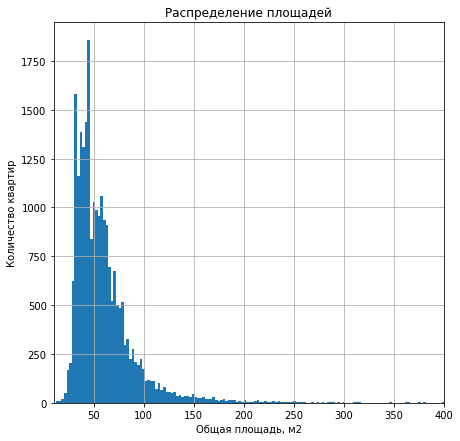

In [39]:
data['total_area'].hist(bins=150, range = (10, 400), figsize = (7, 7))
plt.xlim(10,400)
plt.gca().set(title='Распределение площадей', ylabel='Количество квартир', xlabel='Общая площадь, м2');


По графику видно, что наибольшее число квартир имеет площадь от 40 до 70 квадратных метров. Убедимся в этом с помощью графика Boxplot.

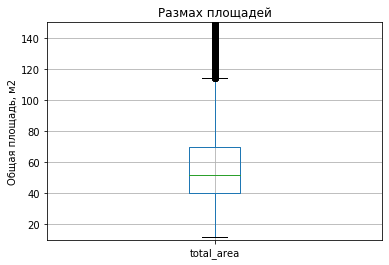

In [40]:
data.boxplot('total_area')
plt.ylim(10, 150)
plt.gca().set(title='Размах площадей', ylabel='Общая площадь, м2');
plt.show()

Размах площадей подтверждает, что большая часть продаваемых квартир лежит в диапозоне от 40 до 70 квадратных метров. В принципе, это подтверждается практикой. В дальнейшем, отрежем хвост выпадающих слишком больших квартир (от 120 квадратных метров).

Расмотрим распределение количества комнат в квартирах. Для этого построим гисторграмму.

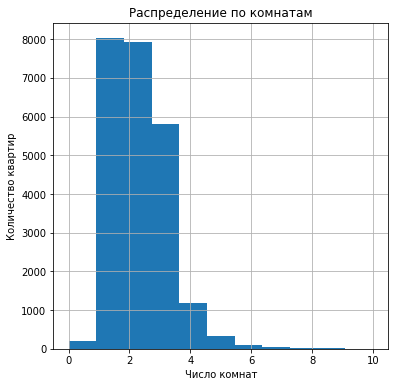

In [41]:
data['rooms'].hist(bins=11, range = (0, 10), figsize = (6, 6))
plt.title('Распределение по комнатам')
plt.ylabel('Количество квартир')
plt.xlabel('Число комнат')
plt.show()

По гистограмме видно, что наибольше всего на рынке предлогают однокомнатные, двухкомнатные и трехкомнатные квартиры. Дальше с увеличеним количества комнат идет резкий спад предложений. Такие квартир не так многь сттроят и они не пользуются особой популярностью. Для дальнейшего анализа типичных квартир оставим только квартиры от 1 до 5 комнат.
<p> Расмотрим распределение по высоте потолков.

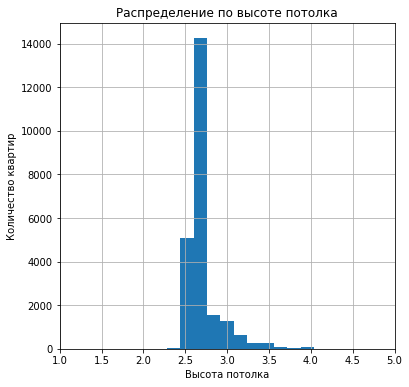

In [42]:
data['ceiling_height'].hist(bins=25 , range = (1, 5), figsize = (6, 6))
plt.xlim(1, 5)
plt.gca().set(title='Распределение по высоте потолка', ylabel='Количество квартир', xlabel='Высота потолка');

Данное распределние лучше всего характиерезует мода. Поэтому,стандартный потолок в Ленингралской области имеет высоту от 2,7 метра. При этом у нас абсолютный максимум в высоте 2,7-2,8 метров. Это стандартная высота потолка в квартире. Больше трех метров потолок имеет старый фонд, котрый так же характерен для Санкт-Петербурга. У нас есть и случаи больше 4 метров. Но это уже редкие двухярусные квартиры или переделанные лофты, которые пердстравлены не в столь большом количестве.

Рассмотрим цену на квартиры в объявлениях. Посторим гистограмму распределение цен и вывидим основные параметры методом describe.

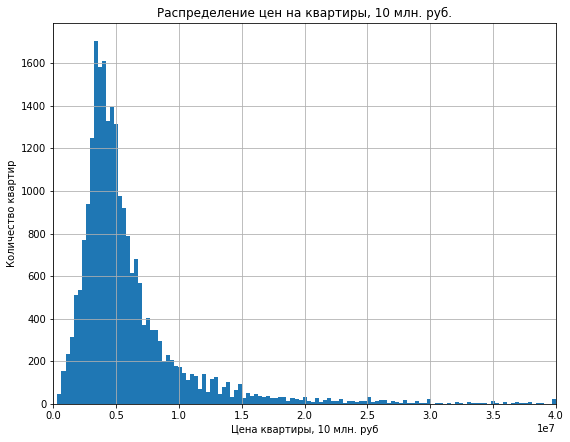

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [43]:
data['last_price'].hist(bins = 125, range = (0, 40000000), figsize = (9, 7))
plt.xlim(0, 40000000)
plt.gca().set(title='Распределение цен на квартиры, 10 млн. руб.', 
              ylabel='Количество квартир', xlabel='Цена квартиры, 10 млн. руб');
plt.show()
data['last_price'].describe()

По гистограмме видно, что большая часть квартирс стоит от 3,5 до 6,8 миллионов рублей. При этом данные содержат длинный хвост из дорогих квартир (цена доходит до 76 млд. рублей). О изменчивости данных говорит большое отличие в средней и медианальной цене и большое средне квадратичное отклонение. Также можно заменить, что после 15 млн. уменьшается число предложений.

Рассмотрим время продажи квартиры. По гистограмме определим, определим слишком быстрые и долгое время продажи. Также выведем основные статичтические данные методом discribe.

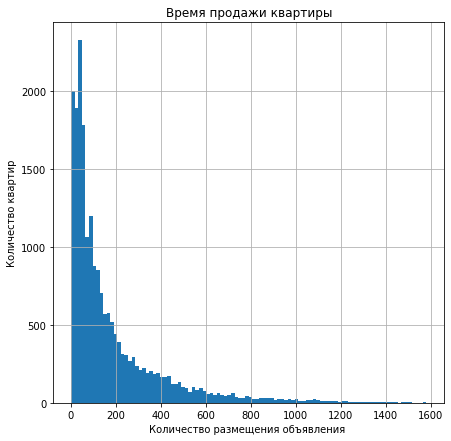

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [44]:
data['days_exposition'].hist(bins = 100, figsize = (7,7))
plt.gca().set(title='Время продажи квартиры', 
              ylabel='Количество квартир', xlabel='Количество размещения объявления ');
plt.show()
data['days_exposition'].describe()

Изучая гистограмму видно, что продажа квартира обычно занимает от 45 до 200 дней. Среднее и медиана сильно отличаются друг от друга. Это связано с тем, что у нас большое количесво долгих объявлений, что увеличивает среднюю продолжительность объявлений.
<br>По графику видно, что после 1000 дней почти нет объявлений. Примем 1000 за верхнюю границу, после которой объявление можно считать необычно долгим.
<br> Продажи быстрее 30 дней можно считать быстрыми. Проверим, как распределяется значение времени прадажи относительно городов.
<br> Создадим столбцы с *too_slow* и *too_fast*. В них разместим будевый переменные в зависимости от принятых нами условий длительности.

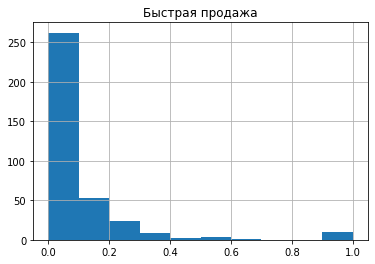

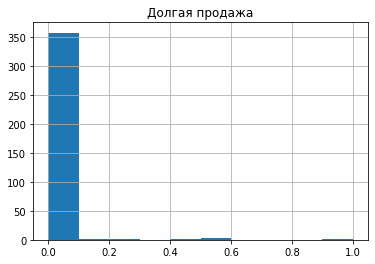

In [45]:
data['too_fast'] = data['days_exposition'] < 30
data['too_slow'] = data['days_exposition'] > 1000

data.pivot_table(index = 'locality_name', values = 'too_fast').hist()
plt.title('Быстрая продажа')
plt.show()
          
data.pivot_table(index = 'locality_name', values = 'too_slow').hist()
plt.title('Долгая продажа')
plt.show()

Значение долгой продажи для болтшинства городов стремиться к 0. Значит мы не ошиблись с выбором. По быстрам продажам сократим срок до 20 дней.

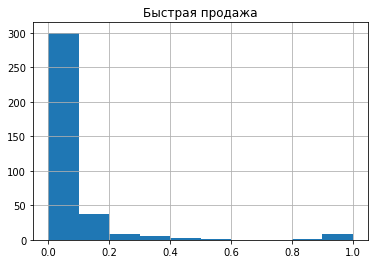

In [46]:
data['too_fast'] = data['days_exposition'] < 20
data.pivot_table(index = 'locality_name', values = 'too_fast').hist()
plt.title('Быстрая продажа')
plt.show()

Соотношение у 0 стало больше. Примем за очень быстрые продажи те, котрые состоялись быстрее чем за 20 дней.

Выше мы рассотмрели данные на предмет вбросов и аномалий. На основе проделанного анализа можем составить предствление о стандартных объявлениях о продаже. 
<p> Стандартное объявление это квартиры площадью до 120 квадратных метров стоимостью до 15 млн. Имеют до 5 комнат с высотой полоков от 2,5 до 3,5 метров. Объявление в публикации до 1000 дней.
<br>Создадим новой сет стандартных объявлений и посмотрим сколько значений осталось.

In [47]:
data_stat = data.query('total_area <= 120') #площадь до 120 кв.м
data_stat = data_stat.query('rooms <= 5') #не больше 5 комнат
data_stat = data_stat.query('2.5 <= ceiling_height <= 3.5') #высота потолков 2,5 - 3,5 метров
data_stat = data_stat.query('days_exposition < 1000') #продажа до 1000 дней
data_stat = data_stat.query('last_price < 20000000')
print(data_stat.shape)
print(len(data_stat) / len(data))

(19105, 32)
0.8078224101479915


В итоговом сете мы имеем 19105, что составляет 80% от первоначальных данных.

### Вывод

В этом пункте изучили основные характеристики квартир: площадь, число комнат, высоту потолков. Проанализировали цены на квартиры и время публикации. На основе этого анализа, выявили редкие значения, от котрых можно избавиться для более точного анализа и поиска закономерностей. Дальнейшая работа будет производиться с обновленным сетом.

### Шаг 6.  Факторы влияющие на стоимость квартиры <a id='step6'></a>

Стоимость квартиры может зависить от площади, числа комнат, этажа и удаленности от центра и времени размещения объявления. Проверим это с помощью корреляционной диаграммы.

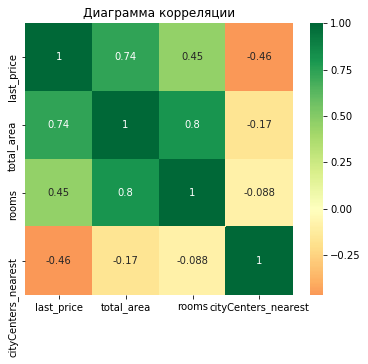

In [48]:
data_st5 = data_stat[['last_price', 'total_area','rooms', 'cityCenters_nearest']] #создадим сет для проверуи гипотезы

plt.figure(figsize=(6,5))
sns.heatmap(data_st5.corr(), xticklabels=data_st5.corr().columns, yticklabels=data_st5.corr().columns,
            cmap='RdYlGn', center=0, annot=True)
plt.title('Диаграмма корреляции')
plt.show()

По диаграмме можно сказать, что больше всего на цену квартиры влияет ее площадь. Также есть отрицательная корреляция между расстоянием от центра и ценой на квартиру. Площадь и количесвтво комнат сильно коррелируют между собой, поэтому непрвильно считать связь числа комнат и цены.
<p> Построим графики распределния для этих двух показателей.

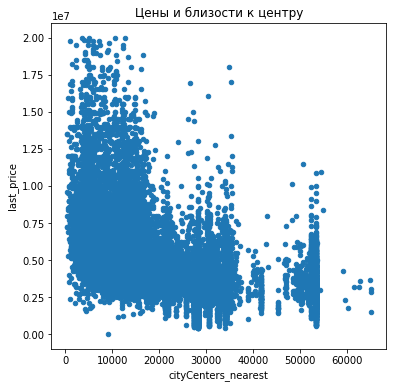

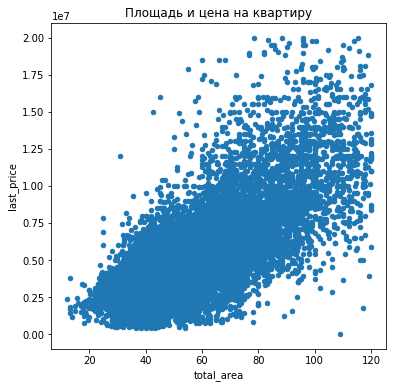

In [49]:
data_st5.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize = (6, 6))
plt.title('Цены и близости к центру')
plt.show()

data_st5.plot(x='total_area', y='last_price', kind='scatter', figsize = (6, 6))
plt.title('Площадь и цена на квартиру')
plt.show()

На диаграмме видно явную зависимость цены квартиры от ее площади.
Посмотрим, как зависит этаж квартиры и цена.

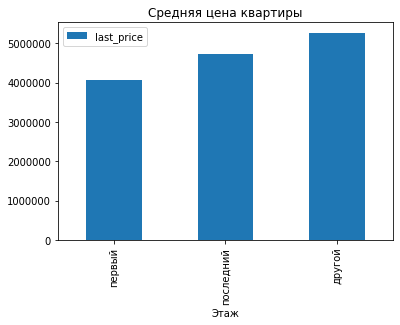

In [50]:
data_stat.pivot_table(index = 'floor_id', values = 'last_price').sort_values('last_price').plot.bar()
plt.title('Средняя цена квартиры')
plt.xlabel('Этаж')
plt.show()

Средняя цена на квартиру на первом этаже ниже чем на последнем. 
<p> Проверим, есть ли зависимость между ценой на квартирой и временем размещения объявления.
<p> Построим графики зависимости цены от дня размещения объявления, месяца и года.

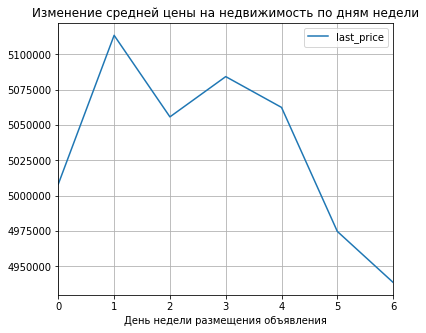

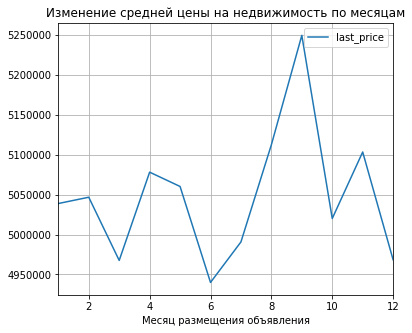

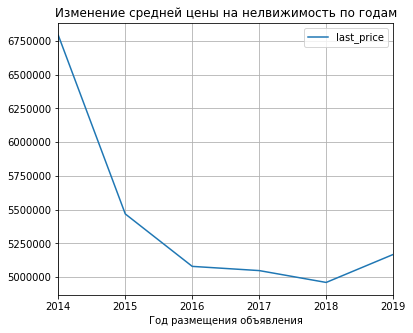

In [51]:
#график по дням недели
data_stat.pivot_table(index = 'wday_exposition', values = 'last_price').plot(figsize = (6, 5)) 
plt.gca().set(title='Изменение средней цены на недвижимость по дням недели', xlabel='День недели размещения объявления')
plt.grid(True)
plt.show()
#график по месяцам
data_stat.pivot_table(index = 'month_exposition', values = 'last_price').plot(figsize = (6, 5))
plt.gca().set(title='Изменение средней цены на недвижимость по месяцам', xlabel='Месяц размещения объявления')
plt.grid(True)
plt.show()
#график по годам
data_stat.pivot_table(index = 'year_exposition', values = 'last_price').plot(figsize = (6, 5))
plt.gca().set(title='Изменение средней цены на нелвижимость по годам', xlabel='Год размещения объявления')
plt.grid(True)
plt.show()

Большая разница в цене на квартиры, которые выложены в выходные дни. В субботу и воскресенье выкладывают самые дешевые квартиры. Самая высокая средняя цена во вторник и четверг. 
<p>В течении года цены на квартиры также меняются. Особый спад происходит в середине и конце года (июнь и декабрь). В 3 квартале кода идет рост цен, и достигает пика в сентябре.
<br> С 2014 по 2018 средняя цена на жилье снижалася. Особенно резко в период 2014-2016 годы. С 2018 года цены начали подниматься.

Посмотрим, как выглядит ТОП-10 городов по числу объявлений и подсчитаем среднию цену за квадратный метр.

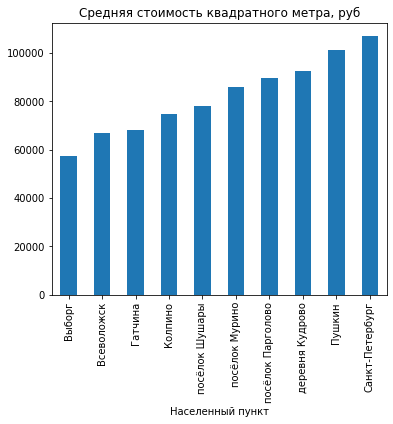

In [52]:
#создадим таблицу с топ городами по количеству объявлений и посчитаем в нем среднее по цене за кв.метр
top_cities = (data_stat.pivot_table(index = 'locality_name', values = 'price_per_sqm', aggfunc = {'count', 'mean'}).
             sort_values('count', ascending = False)).head(10)  


top_cities['mean'].sort_values().plot(kind = 'bar', figsize = (6, 5))
plt.gca().set(title='Средняя стоимость квадратного метра, руб', xlabel='Населенный пункт')
plt.show()


Как и ожидалось, самая высокая стоимость квадратного метра будет в Санкт-Петербурге.Самое дешевое жилье можно найти в Выборге.

### Вывод

В этом шаге проверили от каких параметров зависят цены на квартиру. Самая большая корреляция цены квартиры от ее площадь, что вполне логично. Выявлена  отрицательная взаимосвязь между ценой квартиры и расстоянием до центра. Число комнат сильно коррелирует с площадью, поэтому нельзя сказать что комнаты влияют на цену. Для анализа луше отбросить этот показатель. Подтвердилась взаимосвязь цены квартиры от этажа. Самые дешевые квартиры на первом этаже. Во времени предложения тоже ведут себя нестабильно. К выходным виден явный спад в средней стоимости на рынке. Стоимость квартир ниже в середине и конце года, при этом видно что самый дорогой месяц сентябрь. С 2014 по 2018 год наблюдается спад в стоимости квартир, но сейчас цены начинают расти. Как и ожидалось, самая дорогая цена за квадратный метр в Санкт-Петербурге, а самая низкая в Выборге.

### Шаг 7.  Какая область входит в центр Санкт-Петербурга  <a id='step7'></a>

Возьмем из нашего сета только предложения в Санк-Петербурге. Для удобства занесем таблицу в переменную data_stat_spb.

In [53]:
data_stat_spb = data_stat.query('locality_name == "Санкт-Петербург"').copy()
data_stat_spb.shape

(12460, 32)

Получили сет из 12283 строк.
<br> Создадим столбец с расстоянием до центра в километрах и перевем эти значения в целочисленный формат.

In [54]:
data_stat_spb['cityCenters_nearest_km'] = data_stat_spb['cityCenters_nearest'] / 1000 #перевод метров в километры
data_stat_spb['cityCenters_nearest_km'] = data_stat_spb['cityCenters_nearest_km'].round() #перевод в целое
data_stat_spb[['cityCenters_nearest_km', 'cityCenters_nearest']].head()

,cityCenters_nearest_km,cityCenters_nearest
19904,1.0,964
19807,1.0,1242
19546,5.0,5483
17961,16.0,15945
19558,4.0,4165


Посторим график зависимости средней цены на квартиру в зависимоти от расстония от центра.

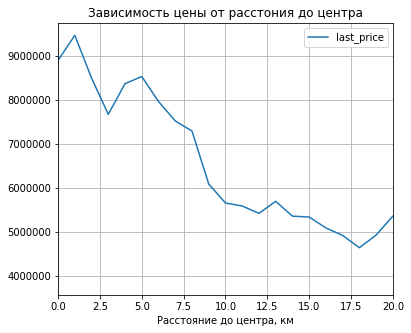

In [55]:
data_stat_spb.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price').plot(figsize = (6, 5))
plt.title('Зависимость цены от расстония до центра')
plt.xlabel('Расстояние до центра, км')
plt.grid(True)
plt.xlim(0, 20) # Граница графика в 20 километров
plt.show()

После 8 километров от центра видим резкое падение цены на недвижимость. Предположим, что это и есть граница центра. Но от расположения может зависеть не только стоимость квартиры, но и цена за квадратный метр. Посторим ноафик зависимоти цены квадратного метра от расположения.

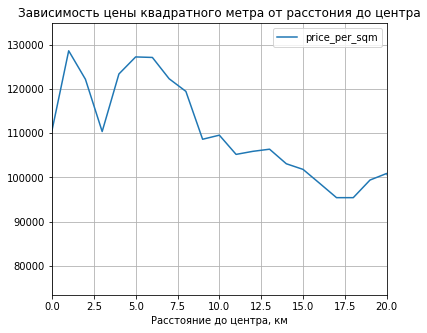

In [56]:
data_stat_spb.pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_sqm').plot(figsize = (6, 5))
plt.title('Зависимость цены квадратного метра от расстония до центра')
plt.xlabel('Расстояние до центра, км')
plt.grid(True)
plt.xlim(0, 20) # Граница графика в 20 километров
plt.show()

На этом графике на расстоянии 8 километров похожее резкое снижение цены за метр. Наше предположение отправдалось и будем считать , что квартиры в радиусе 8 километров находятся в центре Санкт-Петербурга.

### Вывод

Проанализировав зависимость стоимости квартиры и цены за квадратный метр от расстояния до центра, можно сделать вывод, что в квартиры в радиусе восьми километров находятся  от центра находятся в центральной части Санкт-Петербурга. 

### Шаг 8.  Исследование квартир в центре <a id='step8'></a>

Проверим, какие факторы влияют на цену квартиры в центре. Есть ли отличия этих зависимостей от области.
<br>Для начала создадим срез данных, котрый будет включать только квартиры в центре. Назовем его data_stat_spb_centr.

In [57]:
data_stat_spb_centr = data_stat_spb.query('cityCenters_nearest_km <= 8')
data_stat_spb_centr.shape

(2610, 33)

В нашем иследовании  осталось 2491 квартирва. Проанализируем основные параметры:
* площадь 
* цена 
* число комнат
* высота потолков
<p> Для анализа распределения площади постоим гистограмму распеределения по этому параметру.

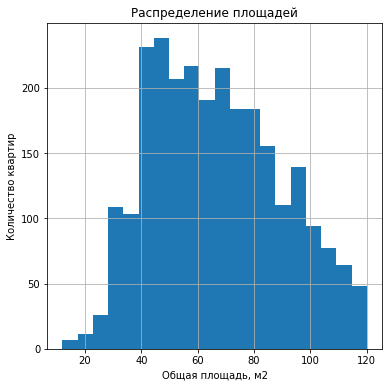

count    2610.000000
mean       66.790138
std        22.925492
min        12.000000
25%        47.300000
50%        64.950000
75%        83.950000
max       120.000000
Name: total_area, dtype: float64

In [58]:
data_stat_spb_centr['total_area'].hist(bins = 20, figsize = (6, 6))
plt.gca().set(title='Распределение площадей', ylabel='Количество квартир', xlabel='Общая площадь, м2');
plt.show()
data_stat_spb_centr['total_area'].describe()

Большая часть квартир имеют площадь от 47 до 81 квадратных метров. Среднее и медианальное значение почти не отличаются, так как мы избавились от выбивающихся значений. Медина 63 квадрата, и это значение больше чем в целом по области.
<p> Посмотрим распредеоление по числу комнат для квартир в центре города.

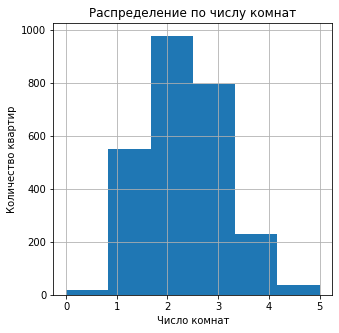

In [59]:
data_stat_spb_centr['rooms'].hist(bins = 6, figsize = (5, 5))
plt.gca().set(title='Распределение по числу комнат', ylabel='Количество квартир', xlabel='Число комнат')
plt.show()

Жилой фонд центра Санкт-Петербурнга представлен в основном двух и трехкомнатными квартирамию Данный показатель не отличается от общего по области. Есть и квартиры студии, котрые скорее всего переделанные коммунальные и большие квартиры (более 3 комнат).
<p> Теперь посмотрим распределение по высоте потолков.

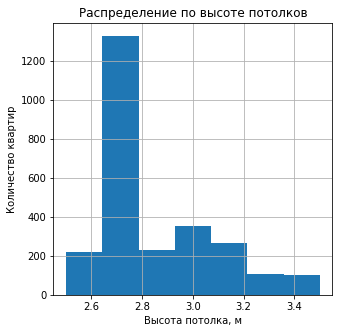

In [60]:
data_stat_spb_centr['ceiling_height'].hist(bins = 7, figsize = (5, 5))
plt.gca().set(title='Распределение по высоте потолков', ylabel='Количество квартир', xlabel='Высота потолка, м')
plt.show()

Как и по области, высота потолков  в центре в пределах 2,7 метров. Но есть всплеск в значениях 3 - 3,2 метра. Связано это со старым фондом, где квартиры имели высокие потолки.

Теперь осталось рассомтреть распределение квартир по цене.

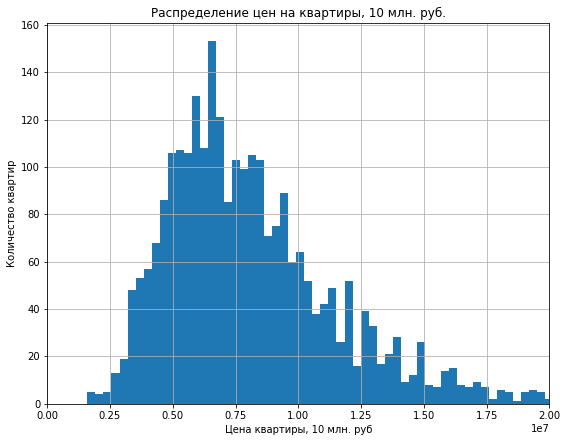

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [61]:
data_stat_spb_centr['last_price'].hist(bins = 125, range = (0, 40000000), figsize = (9, 7))
plt.xlim(0, 20000000)
plt.gca().set(title='Распределение цен на квартиры, 10 млн. руб.', 
              ylabel='Количество квартир', xlabel='Цена квартиры, 10 млн. руб');
plt.show()
data['last_price'].describe()

Большинство квартир стоит от 3.4 до 6.8 миллионов. Этот показатель такой же как и по всей области, что было не очевидно.

Выделите факторы, которые влияют на стоимость квартиры в центре. Посторим диаграмму корреляции стоимости недвижимость от числа комнат, площади недвижимости и удаленности от центра.

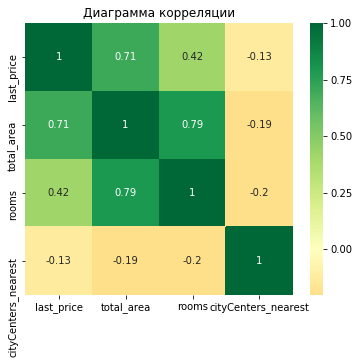

In [62]:
#создадим сет для проверуи гипотезы
data_spb = data_stat_spb_centr[['last_price', 'total_area','rooms', 'cityCenters_nearest', ]] 

plt.figure(figsize=(6,5))
sns.heatmap(data_spb.corr(), xticklabels=data_spb.corr().columns, yticklabels=data_spb.corr().columns,
            cmap='RdYlGn', center=0, annot=True)
plt.title('Диаграмма корреляции')
plt.show()

По диаграмме видна явная зависимость между площадью квартиры и ценой. При этом нет линейной зависимоти между расположением квартиры в центре и ее стоимостью. Убедимся  в этом с помощью диаграммырассеивания.

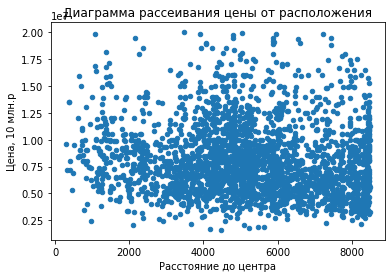

In [63]:
data_stat_spb_centr.plot(kind = 'scatter', x = 'cityCenters_nearest', y = 'last_price',
                         title = 'Диаграмма рассеивания цены от расположения')
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена, 10 млн.р')
plt.show()

Проверим, есть ли зависимость между ценой квартиры и этажом ее расположени. Для этого построим столбчатую диаграмму по средней цене.

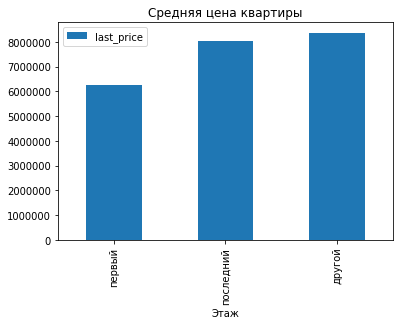

In [64]:
(data_stat_spb_centr.pivot_table(index = 'floor_id', values = 'last_price', aggfunc = 'mean').sort_values(by = 'last_price')
 .plot(kind = 'bar'))
plt.title('Средняя цена квартиры')
plt.xlabel('Этаж')
plt.show()

Как и в значениях для всей области, первый этаж остается самым дешевым. Но в центре меньше разница в средней цене для последних этажей. Открывающиеся виды на центр Санкт-Петербурга увеличивают стоимость жилья.
<p> Теперь посмотрим сохранилась ли закономерность от времени публикации. Построим графики зависимости средней цены на квартиру от дня недели, месяца и года публикации объявлений.

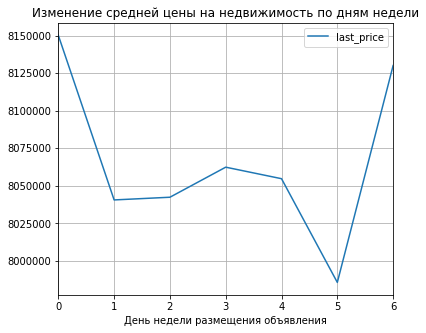

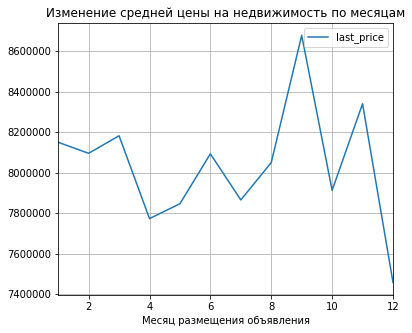

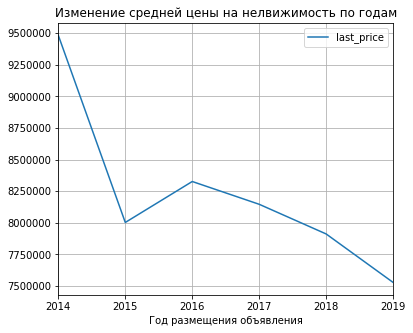

In [65]:
#график по дням недели
data_stat_spb_centr.pivot_table(index = 'wday_exposition', values = 'last_price').plot(figsize = (6, 5)) 
plt.gca().set(title='Изменение средней цены на недвижимость по дням недели', xlabel='День недели размещения объявления')
plt.grid(True)
plt.show()
#график по месяцам
data_stat_spb_centr.pivot_table(index = 'month_exposition', values = 'last_price').plot(figsize = (6, 5))
plt.gca().set(title='Изменение средней цены на недвижимость по месяцам', xlabel='Месяц размещения объявления')
plt.grid(True)
plt.show()
#график по годам
data_stat_spb_centr.pivot_table(index = 'year_exposition', values = 'last_price').plot(figsize = (6, 5))
plt.gca().set(title='Изменение средней цены на нелвижимость по годам', xlabel='Год размещения объявления')
plt.grid(True)
plt.show()

Распределение цены по дням недели для квартир в центре отличается. Несмотря на то, что суббота также является днем с наименишей ценой, в воскресенье цена резко растет, и достигает пика в понедельник.
<br> Самым дорогим месяцем является также сентябрь и наблюдается снижение цены к концу года. Минимаольные значения теперь имеют другую сезонность, и минимум только в декабре.
<br> Цены на недвижимость в центре также регко упали в 2015 году. Несмотря на небольшой взлет в 2016 году в отличии от ситуации по всей области, стоимость жилья в центре продолжает падать.

### Вывод

Провели исследование объявлений по продаже квартир в центре Санкт-Петербурга. Средняя площадь квартир в центер немного больше чем тот же показатель по всему городу. Высота потолко и число комнат не отличаются, при этом цена медиана ценв не изменилась по сравнению со всем городом, что не очевидно. 
<br> Цена квартиры в центральной также в большей степени зависит от ее площади. В отличии от всей области, цена в центре не зависит от располождения. Для этих квартир немного изменилась структура сезонности. Самые дорогие предложения также выкладываются в сентября, но минимум стоимоси наблюдается только в декабре. По дням недели стоимости квартир тоже отличаются. В отличии от состояния по всех области, где в восресенье идет спад, для квартир в центре наблюдается резкий подъем, с максимумов в понедельник. 
<br>Цены на квартиры в центре города продолжают падать. Это может зависеть от ряда факторов, например, изнашивание домов и плохое состояние квартир в старых домах.

### Шаг 9. Общий вывод  <a id='step9'></a>

Провели исследование объявлений о продаже квартир в Санк-Петербурге и области. В результате исследования был проведен анализ данных из сервиса Яндекс.Недвижимость. На первом этапе была произведена предобработка данных. Были выявлены основные типы переменных, количество пропусков. Для борьбы с пропусками были использованы различные методы (замена на медианы для количесвенных переменных, булевые значения для логических). Данные, котрые невозможно восстановить были удалены или не заполнены. 
<br>Были отброшены все редкие значения, для анализа стандартных обявлений типичных квартир. В результае анализа были выявлены основные факторы влияющие на стоимость квартиры. Больше всего стоимость зависит от площади квартиры и ее местоположение относительно центра. При этом для квартир в центре положение не влияет на цену. Во всем регионе квартиры на первом этаже в среднем стоят дешевле чем на последнем. Из неочевидных наблюдений, что стоимость квартир в объявлениях имеет сезонность. Так для всех предоллжений самым дорогим месяцем является сентябрь. Цены по всему региону в среднем снижаются в середине и конце года. Это не характерно для квартир в центре, где минимум достигается только в декабре. Интерес предъставляет и распределение по дням недели. На объявления, выложенные в конце недели, цена снижается. В общем по области минимум наблюдается минимальные цены в воскресенье, но квартиры в центре начинают резко дорожать. Для них минимум в субботу.
<br> С 2014 года цены на квартиры по региону начали падать, но в 2018 году виден рост цен. Этот рост обусловлен подоражанием подорожанием квартир на окраине. Возможно началось введение в эксплуатацию множества жилых комплексов. Стоимость квартир в центре продалжает падать.